<a href="https://colab.research.google.com/github/adnan-math/Polarization-Reduction/blob/main/polblog_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.read_gml("drive/MyDrive/polblogs.gml", label ="id")

G = G_directed.to_undirected()


components = list(nx.connected_components(graph))
# Find the largest connected component
largest_component = max(components, key=len)
# Create a subgraph with the largest connected component
graph = graph.subgraph(largest_component)

# Number of nodes
num_nodes = graph.number_of_nodes()

# Number of edges
num_edges = graph.number_of_edges()

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Separate nodes based on value
nodes_with_value_0 = [node for node in graph.nodes() if graph.nodes[node]['value'] == 0]
nodes_with_value_1 = [node for node in graph.nodes() if graph.nodes[node]['value'] == 1]

print("Nodes with value 0:", nodes_with_value_0)
print("Nodes with value 1:", nodes_with_value_1)

# Create a vector assigning -1 to nodes with value 0
node_values = [-1 if node in nodes_with_value_0 else graph.nodes[node]['value'] for node in graph.nodes()]
# Separate nodes based on value
nodes_with_value_minus_1 = [node for node, value in zip(graph.nodes(), node_values) if value == -1]
nodes_with_value_1 = [node for node, value in zip(graph.nodes(), node_values) if value == 1]

print("Nodes with value -1:", nodes_with_value_minus_1)
print("Nodes with value 1:", nodes_with_value_1)

FileNotFoundError: ignored

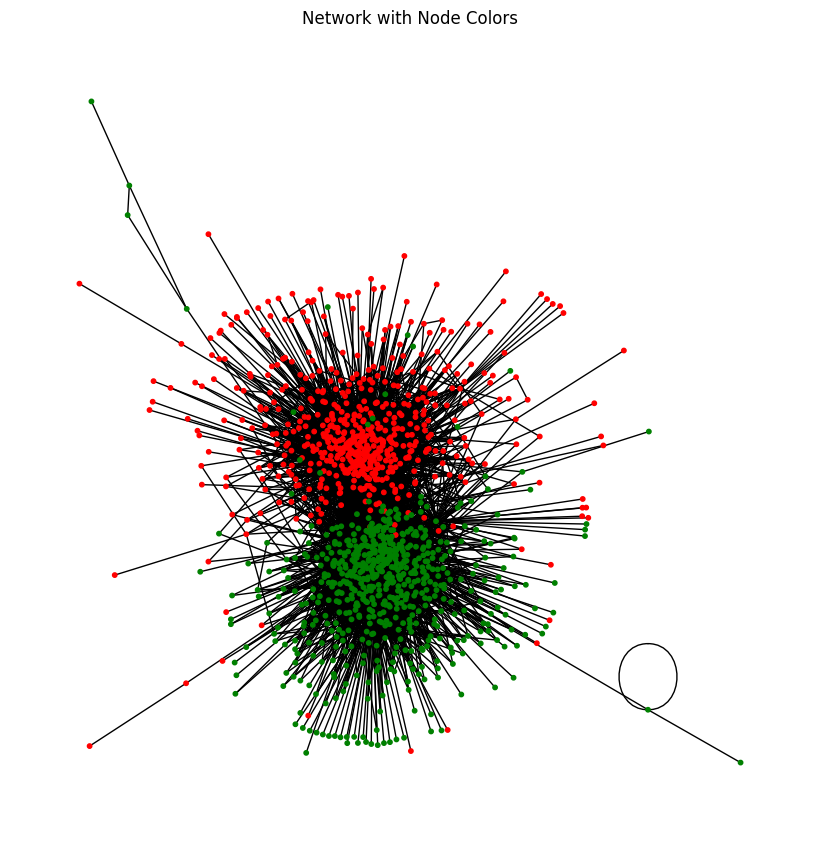

In [ ]:
# Set node colors based on opinion values
node_colors = ["red" if node in nodes_with_value_minus_1 else "green" for node in graph.nodes()]

# Draw the network with node colors
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph)  # Layout for visualizing the graph
nx.draw(graph, pos, node_color=node_colors, with_labels=False, node_size = 10)
plt.title("Network with Node Colors")
plt.show()

Nodes in group1: [760, 761, 762, 763, 764, 765, 766, 767, 768, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 784, 786, 787, 788, 790, 791, 792, 793, 794, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 846, 847, 848, 849, 850, 851, 852, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 868, 869, 870, 871, 872, 873, 874, 875, 876, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 903, 904, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 918, 919, 920, 921, 922, 925, 926, 927, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 950, 951, 952, 953, 954, 955, 956, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 970, 971, 972, 973, 974, 975, 977, 978, 979, 98

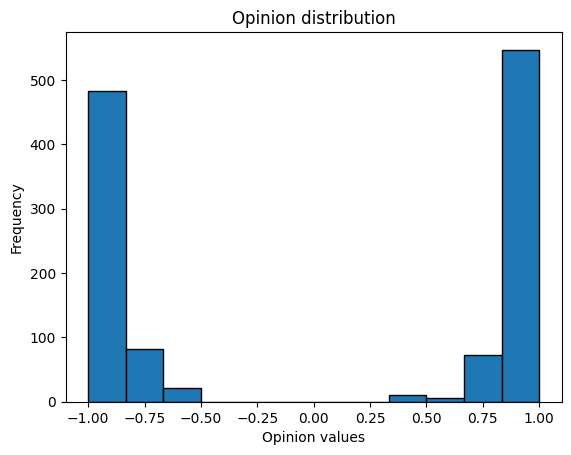

In [ ]:
import networkx as nx
import numpy as np


def evolveopinions(am, exposure, steps, alpha):
    s = np.zeros((am.shape[0], steps))
    for i in range(s.shape[0]):
        s[i, 0] = exposure[i]

    for i in range(s.shape[0]):
        for t in range(1, s.shape[1]):
            sum_opinions = 0
            sum_neighbours = 0
            for j in range(s.shape[0]):
                sum_opinions += am[i, j] * s[j, t-1]
                sum_neighbours += am[i, j]
            s[i, t] = alpha * s[i, t-1] + (1 - alpha) * sum_opinions / sum_neighbours

    opinions = s[:, steps-1]
    return opinions


# Get the adjacency matrix
am = nx.adjacency_matrix(graph).todense()
steps = 3
alpha = 0.85
opinions = evolveopinions(am, node_values, steps, alpha)

# Create a histogram
plt.hist(opinions, bins='auto', edgecolor='black')
plt.xlabel("Opinion values")
plt.ylabel("Frequency")
plt.title("Opinion distribution")

# Group opinions based on the threshold
group1 = opinions[opinions > 0]
group2 = opinions[opinions < 0]

# Retrieve the nodes based on the final manipulated values
nodes_group1 = [node for node, value in zip(graph.nodes(), opinions) if value in group1]
nodes_group2 = [node for node, value in zip(graph.nodes(), opinions) if value in group2]

# Print the results
print("Nodes in group1:", nodes_group1)
print("Nodes in group2:", nodes_group2)

In [ ]:
# Function to get opinion value from a node
def opinion_value(graph, node):
    for n, value in zip(graph.nodes(), opinions):
        if n == node:
            return value

In [ ]:
# Create a set to store the unique edges within each group
edges_within_group1_set = set()
edges_within_group2_set = set()

# Number of edges between group1 and group2
edges_between_groups = sum(1 for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Number of edges within group1
for node1 in nodes_group1:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group1 and neighbor != node1:
            edges_within_group1_set.add(tuple(sorted((node1, neighbor))))

# Number of edges within group2
for node1 in nodes_group2:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group2 and neighbor != node1:
            edges_within_group2_set.add(tuple(sorted((node1, neighbor))))

# Get the counts of unique edges within each group
edges_within_group1 = len(edges_within_group1_set)
edges_within_group2 = len(edges_within_group2_set)


# Print the results
print("Number of edges between group1 and group2:", edges_between_groups)
print("Number of edges within group1:", edges_within_group1)
print("Number of edges within group2:", edges_within_group2)

Number of edges between group1 and group2: 1572
Number of edges within group1: 7836
Number of edges within group2: 7300


In [ ]:
# Compute the sum of product of opinions for edges between group1 and group2
edge_opinion_sum_between_groups = sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group1
edge_opinion_sum_within_group1 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group2
edge_opinion_sum_within_group2 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# Print the results
print("Sum of product of opinions for edges between group1 and group2:", edge_opinion_sum_between_groups)
print("Sum of product of opinions for edges within group1:", edge_opinion_sum_within_group1)
print("Sum of product of opinions for edges within group2:", edge_opinion_sum_within_group2)


Sum of product of opinions for edges between group1 and group2: -1049.603403241883
Sum of product of opinions for edges within group1: 6177.698986660555
Sum of product of opinions for edges within group2: 5894.224596423441


In [ ]:
# Sort the nodes based on the opinion values
nodes_group1 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group1][::-1]
nodes_group2 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group2]

n1 = len(nodes_group1)
n2 = len(nodes_group2)
N = 0.5 * (num_nodes * (num_nodes - 1) - n1 * (n1 - 1) - n2 * (n2 - 1))
print("N =", N)


#########################################################################################

# Calculate the number of nodes to select from each list (10% of the total number of nodes in each group)
num_top_nodes_group1 = int(np.ceil(len(nodes_group1) * 0.05))
num_top_nodes_group2 = int(np.ceil(len(nodes_group2) * 0.05))

# Take the top 10% nodes from each list based on their opinion values
top_nodes_group1 = nodes_group1[:num_top_nodes_group1]
top_nodes_group2 = nodes_group2[:num_top_nodes_group2]

# Compute the product of opinions for all pairs of selected nodes from the two lists
opinion_product_pairs = []
for node1 in top_nodes_group1:
    for node2 in top_nodes_group2:
        # Access the opinions directly from the NumPy array using indexing and handle missing opinions with 0
        opinion_product = opinion_value(graph,node1) * opinion_value(graph,node2)
        opinion_product_pairs.append((node1, node2, opinion_product))

# Sort the list of node pairs based on the product of opinions in descending order
opinion_product_pairs_sorted = sorted(opinion_product_pairs, key=lambda x: x[2], reverse=False)
# The nodes in opinion_product_pairs_sorted are now sorted based on the product of opinions between the top 5% nodes in each group.

# Take the top 5% of the sorted list based on the product of opinions
top_edges = int(N * 0.0)
top_opinion_product_pairs = opinion_product_pairs_sorted[:top_edges]

# Create a new graph to add the edges
G_with_edges = graph.copy()

# Initialize the variable to store the sum of product of opinions
sum_product_opinions = 0

# Now add edges between the nodes corresponding to the top_opinion_product_pairs
for node1, node2, opinion_product in top_opinion_product_pairs:
    G_with_edges.add_edge(node1, node2)
    sum_product_opinions += opinion_product

# # Count the number of edges in the graph G_with_edges
# num_edges = G_with_edges.number_of_edges()

# Print the sum of the product of opinions and the number of edges
print("Sum of product of opinions:", sum_product_opinions)
print("Number of edges in the graph:", num_edges)


############################################################
# Compute group means
CG_minus = np.mean(group1)
CG_plus = np.mean(group2)
d = abs(CG_plus-CG_minus)/2


E = edges_between_groups + top_edges
rho = E / N

s = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum_product_opinions
      + edge_opinion_sum_within_group2)/ (num_edges+top_edges)

print(s)

polarization = 0.5 * d * max((s + (1 - rho)),0)
print("Polarization", polarization)


N = 372696.0
Sum of product of opinions: 0
Number of edges in the graph: 16710
0.6596241879019817
Polarization 0.736682491965201


In [ ]:
# # Sort the nodes based on the opinion values
# nodes_group1 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group1][::-1]
# nodes_group2 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group2]

# n1 = len(nodes_group1)
# n2 = len(nodes_group2)
# N = 0.5 * (num_nodes * (num_nodes - 1) - n1 * (n1 - 1) - n2 * (n2 - 1))
# print("N =", N)

# # Define lists to store the results for different values of N
# N_values = []
# s_values = []
# rho_values = []
# polarization_values = []

# # Loop over different values of N (e.g., 0.1, 0.2, 0.3, ..., 1.0)
# for percent_top_nodes in range(0, 11):
#     # Calculate the number of nodes to select from each list (percent_top_nodes% of the total number of nodes in each group)
#     num_top_nodes_group1 = int(np.ceil(len(nodes_group1) * percent_top_nodes / 100))
#     num_top_nodes_group2 = int(np.ceil(len(nodes_group2) * percent_top_nodes / 100))

#     # Take the top percent_top_nodes% nodes from each list based on their opinion values
#     top_nodes_group1 = nodes_group1[:num_top_nodes_group1]
#     top_nodes_group2 = nodes_group2[:num_top_nodes_group2]

#     # Compute the product of opinions for all pairs of selected nodes from the two lists
#     opinion_product_pairs = []
#     for node1 in top_nodes_group1:
#         for node2 in top_nodes_group2:
#             # Access the opinions directly from the NumPy array using indexing and handle missing opinions with 0
#             opinion_product = opinion_value(graph, node1) * opinion_value(graph, node2)
#             opinion_product_pairs.append((node1, node2, opinion_product))

#     # Sort the list of node pairs based on the product of opinions in descending order
#     opinion_product_pairs_sorted = sorted(opinion_product_pairs, key=lambda x: x[2], reverse=False)

#     # Take the top percent_top_nodes% of the sorted list based on the product of opinions
#     top_edges = int(N * percent_top_nodes / 100)
#     top_opinion_product_pairs = opinion_product_pairs_sorted[:top_edges]

#     # Create a new graph to add the edges
#     G_with_edges = graph.copy()

#     # Initialize the variable to store the sum of product of opinions
#     sum_product_opinions = 0

#     # Now add edges between the nodes corresponding to the top_opinion_product_pairs
#     for node1, node2, opinion_product in top_opinion_product_pairs:
#         G_with_edges.add_edge(node1, node2)
#         sum_product_opinions += opinion_product

#     # Count the number of edges in the graph G_with_edges
#     num_edges = G_with_edges.number_of_edges()

#     # Compute group means
#     CG_minus = np.mean(group1)
#     CG_plus = np.mean(group2)
#     d = abs(CG_plus - CG_minus) / 2

#     E = edges_between_groups + top_edges
#     rho = E / N

#     s = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum_product_opinions
#           + edge_opinion_sum_within_group2) / (num_edges + top_edges)

#     polarization = 0.5 * d * max((s + (1 - rho)), 0)

#     # Store the values for this value of N
#     N_values.append(percent_top_nodes)
#     s_values.append(s)
#     rho_values.append(rho)
#     polarization_values.append(polarization)

# # Print the results for different values of N
# for N_val, s_val, rho_val, polarization_val in zip(N_values, s_values, rho_values, polarization_values):
#     print("N =", N_val)
#     print("S =", s_val)
#     print("Rho =", rho_val)
#     print("Polarization =", polarization_val)


In [ ]:
import numpy as np
# Sort the nodes based on the opinion values
nodes_group11 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group1][::-1]
nodes_group22 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group2]

n1 = len(nodes_group11)
n2 = len(nodes_group22)
N = 0.5 * (num_nodes * (num_nodes - 1) - n1 * (n1 - 1) - n2 * (n2 - 1))
print("N =", N)

# Define lists to store the results for different values of N
N_values = []
s_values = []
rho_values = []
polarization_values = []

# Loop over different values of N (e.g., 0.1, 0.2, 0.3, ..., 1.0)
for percent_top_nodes in range(0, 11):
    # Calculate the number of nodes to select from each list (percent_top_nodes% of the total number of nodes in each group)
    num_top_nodes_group1 = int(np.ceil(len(nodes_group11) * 25*percent_top_nodes / 100))
    num_top_nodes_group2 = int(np.ceil(len(nodes_group22) * 25*percent_top_nodes / 100))

    # Take the top percent_top_nodes% nodes from each list based on their opinion values
    top_nodes_group1 = nodes_group1[:num_top_nodes_group1]
    top_nodes_group2 = nodes_group2[:num_top_nodes_group2]

    # Compute the product of opinions for all pairs of selected nodes from the two lists
    opinion_product_pairs = []
    for node1 in top_nodes_group1:
        for node2 in top_nodes_group2:
            # Access the opinions directly from the NumPy array using indexing and handle missing opinions with 0
            opinion_product = opinion_value(graph, node1) * opinion_value(graph, node2)
            opinion_product_pairs.append((node1, node2, opinion_product))

    # Sort the list of node pairs based on the product of opinions in descending order
    opinion_product_pairs_sorted = sorted(opinion_product_pairs, key=lambda x: x[2], reverse=False)

    # Take the top percent_top_nodes% of the sorted list based on the product of opinions
    top_edges = int(N * percent_top_nodes *0.01)
    top_opinion_product_pairs = opinion_product_pairs_sorted[:top_edges]
    print("Top edges", len(top_opinion_product_pairs))

    # Create a new graph to add the edges
    # G_with_edges = graph.copy()

    # Initialize the variable to store the sum of product of opinions
    sum_product_opinions = 0

    # Now add edges between the nodes corresponding to the top_opinion_product_pairs
    for node1, node2, opinion_product in top_opinion_product_pairs:
        # G_with_edges.add_edge(node1, node2)
        sum_product_opinions += opinion_product
    print("sum_product_opinions", sum_product_opinions)
    # Count the number of edges in the graph G_with_edges
    # num_edges = G_with_edges.number_of_edges()
    num_edges = graph.number_of_edges()+ top_edges
    # Compute group means
    CG_minus = np.mean(group1)
    CG_plus = np.mean(group2)
    d = abs(CG_plus - CG_minus) / 2

    E = edges_between_groups + top_edges
    rho = E / N
    print(rho)

    s = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum_product_opinions
          + edge_opinion_sum_within_group2) / (num_edges)

    polarization = 0.5 * d * max((s + (1 - rho)), 0)
    print("polarization", polarization)
    print("s",s)
    # Store the values for this value of N
    N_values.append(percent_top_nodes)
    s_values.append(s)
    rho_values.append(rho)
    polarization_values.append(polarization)


N = 372696.0
Top edges 0
sum_product_opinions 0
0.004217914868954858
polarization 0.736682491965201
s 0.6596241879019817
Top edges 3726
sum_product_opinions -3711.0262685834005
0.014215339043080687
polarization 0.5979014518706071
s 0.3577654096329376
Top edges 7453
sum_product_opinions -7392.456712815938
0.024215446369158778
polarization 0.5010919856307839
s 0.15022403952432128
Top edges 11180
sum_product_opinions -11025.783930168916
0.03421555369523687
polarization 0.42973438797794317
s -0.00012419327095027484
Top edges 14907
sum_product_opinions -14618.825152559666
0.04421566102131496
polarization 0.37471785975465777
s -0.11375225267158655
Top edges 18634
sum_product_opinions -18178.716251932397
0.05421576834739305
polarization 0.3307830903168774
s -0.20247838592378578
Top edges 22361
sum_product_opinions -21707.845966503366
0.06421587567347115
polarization 0.2947315904522573
s -0.2734899487256854
Top edges 26088
sum_product_opinions -25212.108301335975
0.07421598299954923
polarizati

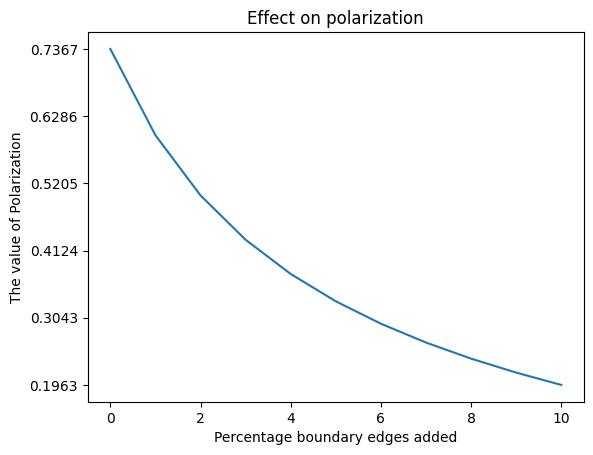

In [ ]:
x = [i for i in range(11)]
plt.plot(x, polarization_values)
plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of Polarization")
plt.title("Effect on polarization")

# Adjust the y-axis ticks
plt.yticks(np.linspace(min(polarization_values), max(polarization_values), 6))

plt.show()

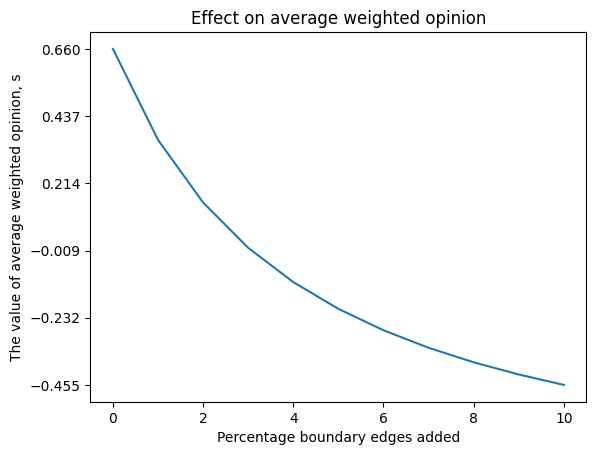

In [ ]:
# x = [0,1,2,3,4,5]
plt.plot(x,s_values)

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of average weighted opinion, s")
plt.title("Effect on average weighted opinion")

# Adjust the y-axis ticks
plt.yticks(np.linspace(min(s_values), max(s_values), 6))

plt.show()

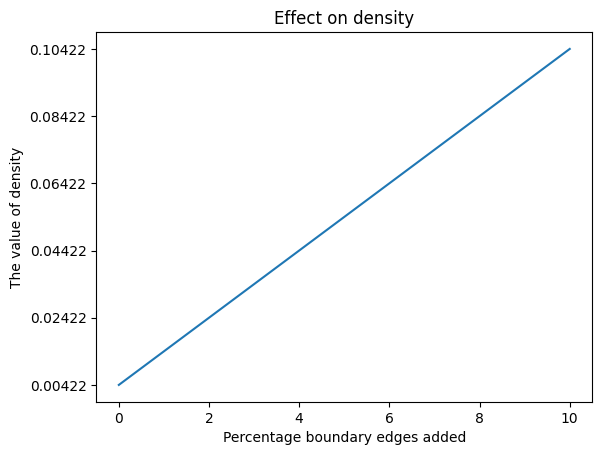

In [ ]:
# x = [0,1,2,3,4,5]
plt.plot(x,rho_values)

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of density")
plt.title("Effect on density")

# Adjust the y-axis ticks
plt.yticks(np.linspace(min(rho_values), max(rho_values), 6))

plt.show()

---
---
---
---
---

# **Betweeness Cnetrality**

In [ ]:
# Function to get opinion value from a node
def opinion_value(graph, node):
    for n, value in zip(graph.nodes(), opinions):
        if n == node:
            return value

# Create a set to store the unique edges within each group
edges_within_group1_set = set()
edges_within_group2_set = set()

# Number of edges between group1 and group2
edges_between_groups = sum(1 for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Number of edges within group1
for node1 in nodes_group1:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group1 and neighbor != node1:
            edges_within_group1_set.add(tuple(sorted((node1, neighbor))))

# Number of edges within group2
for node1 in nodes_group2:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group2 and neighbor != node1:
            edges_within_group2_set.add(tuple(sorted((node1, neighbor))))

# Get the counts of unique edges within each group
edges_within_group1 = len(edges_within_group1_set)
edges_within_group2 = len(edges_within_group2_set)

# Print the results
print("Number of edges between group1 and group2:", edges_between_groups)
print("Number of edges within group1:", edges_within_group1)
print("Number of edges within group2:", edges_within_group2)

# Compute the sum of product of opinions for edges between group1 and group2
edge_opinion_sum_between_groups = sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group1
edge_opinion_sum_within_group1 = 0.5 * sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group2
edge_opinion_sum_within_group2 = 0.5 * sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# Print the results
print("Sum of product of opinions for edges between group1 and group2:", edge_opinion_sum_between_groups)
print("Sum of product of opinions for edges within group1:", edge_opinion_sum_within_group1)
print("Sum of product of opinions for edges within group2:", edge_opinion_sum_within_group2)


# # Compute the sum of product of opinions for edges between group1 and group2
# edge_opinion_sum_between_groups = sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# # Compute the sum of product of opinions for edges within group1
# edge_opinion_sum_within_group1 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# # Compute the sum of product of opinions for edges within group2
# edge_opinion_sum_within_group2 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# # Print the results
# print("Sum of product of opinions for edges between group1 and group2:", edge_opinion_sum_between_groups)
# print("Sum of product of opinions for edges within group1:", edge_opinion_sum_within_group1)
# print("Sum of product of opinions for edges within group2:", edge_opinion_sum_within_group2)

Number of edges between group1 and group2: 1572
Number of edges within group1: 7836
Number of edges within group2: 7300
Sum of product of opinions for edges between group1 and group2: -1049.6034032418809
Sum of product of opinions for edges within group1: 6177.698986660498
Sum of product of opinions for edges within group2: 5894.224596423471


In [ ]:
import math as m
import networkx as nx
import matplotlib.pyplot as plt

# Define your graph and nodes_group1, nodes_group2, edge_opinion_sum_between_groups, edge_opinion_sum_within_group1, edge_opinion_sum_within_group2, num_edges, N, d here

def calculate_polarization(e_b):
    # Calculate the degree centrality for all nodes in the graph
    betweenness_centrality = nx.betweenness_centrality(graph)

    # Filter the degree centrality results based on the groups
    group1_centrality = {node: betweenness_centrality[node] for node in nodes_group1}
    group2_centrality = {node: betweenness_centrality[node] for node in nodes_group2}

    # Sort the nodes based on their degree centrality
    top_group1_nodes = sorted(group1_centrality, key=group1_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]
    top_group2_nodes = sorted(group2_centrality, key=group2_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]

    # Add edges between the top influential nodes from opposite groups
    edges = [(node1, node2) for node1 in top_group1_nodes for node2 in top_group2_nodes]

    # Convert edges list to set and back to list to remove duplicates
    edges = list(set(edges))

    # Limit the number of edges to not exceed max_edges
    if len(edges) > e_b:
        edges = edges[:e_b]

    print("Total edges after adding boundary edges:", len(edges))
    # Calculate the edges product for each unique edge
    edges_product = []
    for u, v in edges:
        product = opinion_value(graph, u) * opinion_value(graph, v)
        edges_product.append(product)

    num_edges = graph.number_of_edges()
    # print("Total unique edges after adding boundary edges:", len(edges))
    print("Edges product:", sum(edges_product))

    # Calculate polarization
    s = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum(edges_product)
         + edge_opinion_sum_within_group2) / (num_edges + len(edges))

    print("s =", s)

    rho = (len(edges_product) + edges_between_groups) / N
    print(rho)
    return s, rho

# List to store polarization, s, and rho values for different values of e_b
polariz_bet_values = []
s_bet_values = []
rho_bet_values = []

# List of different values of e_b
e_b_values = [int(N * i *0.01) for i in range(0,11)]  # Add more values as needed

# Loop through different values of e_b and calculate polarization, s, and rho
for e_b in e_b_values:
    # print(e_b)
    s, rho = calculate_polarization(e_b)
    s_bet_values.append(s)
    rho_bet_values.append(rho)
    polarization = 0.5 * d * max(s + (1 - rho), 0)
    print("polarization",polarization)
    polariz_bet_values.append(polarization)


Total edges after adding boundary edges: 0
Edges product: 0
s = 0.6596241879019802
0.004217914868954858
polarization 0.7366824919652002
Total edges after adding boundary edges: 3726
Edges product: -2842.9819079301988
s = 0.40024164571892196
0.014215339043080687
polarization 0.6168040620388004
Total edges after adding boundary edges: 7453
Edges product: -5684.060541197498
s = 0.2209270222507383
0.024215446369158778
polarization 0.5325559533302892
Total edges after adding boundary edges: 11180
Edges product: -8544.246827337676
s = 0.08885167990334929
0.03421555369523687
polarization 0.46933008665481707
Total edges after adding boundary edges: 14907
Edges product: -11444.537141105648
s = -0.013354112068303755
0.04421566102131496
polarization 0.4193966516700629
Total edges after adding boundary edges: 18634
Edges product: -14305.076267712057
s = -0.09288015187499911
0.05421576834739305
polarization 0.37955607220616056
Total edges after adding boundary edges: 22361
Edges product: -17261.622

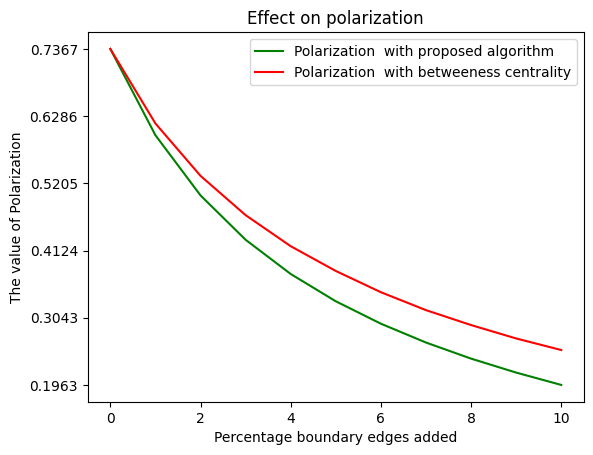

In [ ]:
x = [i for i in range(11)]

plt.plot(x, polarization_values, label="Polarization  with proposed algorithm", color = "green")
plt.plot(x, polariz_bet_values, label="Polarization  with betweeness centrality",color="red")
# plt.plot(x, polariz_deg_values, label="Polarization  with degree centrality", color="blue")
# plt.plot(x, polariz_rand_values, label="Polarization  with random edges", color="black")

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of Polarization")
plt.title("Effect on polarization")

# Adjust the y-axis ticks
min_value = min(min(polariz_bet_values), min(polarization_values))
max_value = max(max(polariz_bet_values), max(polarization_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()
plt.show()

# **Degree Centrality**

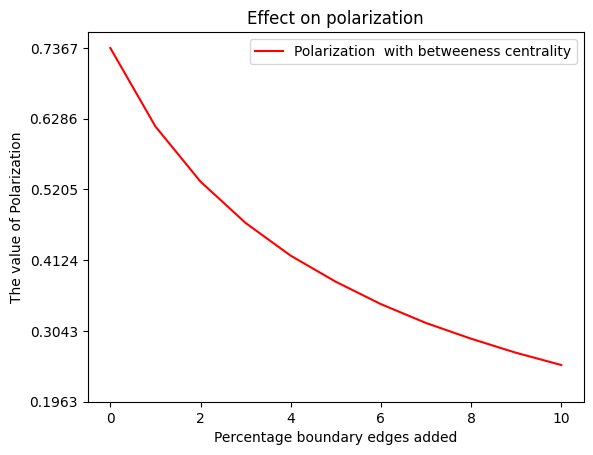

In [ ]:
x = [i for i in range(11)]

# plt.plot(x, polarization_values, label="Polarization  with proposed algorithm", color = "green")
plt.plot(x, polariz_bet_values, label="Polarization  with betweeness centrality",color="red")
# plt.plot(x, polariz_deg_values, label="Polarization  with degree centrality", color="blue")
# plt.plot(x, polariz_rand_values, label="Polarization  with random edges", color="black")

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of Polarization")
plt.title("Effect on polarization")

# Adjust the y-axis ticks
min_value = min(min(polariz_bet_values), min(polarization_values))
max_value = max(max(polariz_bet_values), max(polarization_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()
plt.show()

In [ ]:
def calculate_polariz(e_b):
    # Calculate the degree centrality for all nodes in the graph
    degree_centrality = nx.degree_centrality(graph)

    # Filter the degree centrality results based on the groups
    group1_centrality = {node: degree_centrality[node] for node in nodes_group1}
    group2_centrality = {node: degree_centrality[node] for node in nodes_group2}


    # Sort the nodes based on their degree centrality
    top_group1_nodes = sorted(group1_centrality, key=group1_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]
    top_group2_nodes = sorted(group2_centrality, key=group2_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]

    # Add edges between the top influential nodes from opposite groups
    edges = [(node1, node2) for node1 in top_group1_nodes for node2 in top_group2_nodes]

    # Convert edges list to set and back to list to remove duplicates
    edges = list(set(edges))

    # Limit the number of edges to not exceed max_edges
    if len(edges) > e_b:
        edges = edges[:e_b]

    print("Total edges after adding boundary edges:", len(edges))
    # Calculate the edges product for each unique edge
    edges_product = []
    for u, v in edges:
        product = opinion_value(graph, u) * opinion_value(graph, v)
        edges_product.append(product)

    num_edges = graph.number_of_edges()
    # print("Total unique edges after adding boundary edges:", len(edges))
    print("Edges product:", sum(edges_product))

    # Calculate polarization
    ss = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum(edges_product)
          + edge_opinion_sum_within_group2) / (num_edges + len(edges))

    print("s =", s)

    rhoo = (len(edges_product) + edges_between_groups) / N
    print(rho)
    return ss, rhoo




# List to store polarization, s, and rho values for different values of e_b
polariz_deg_values = []
s_deg_values = []
rho_deg_values = []

# List of different values of e_b
e_b_values = [int(N * i *0.01) for i in range(0,11)]  # Add more values as needed

# Loop through different values of e_b and calculate polarization, s, and rho
for e_b in e_b_values:
    # print(e_b)
    ss, rhoo = calculate_polariz(e_b)
    s_deg_values.append(ss)
    rho_deg_values.append(rhoo)
    polarization1 = 0.5 * d * max(ss + (1 - rhoo), 0)
    print("polarization",polarization1)
    polariz_deg_values.append(polarization1)

Total edges after adding boundary edges: 0
Edges product: 0
s = -0.32865221576282766
0.1042163049777835
polarization 0.7366824919652002
Total edges after adding boundary edges: 3726
Edges product: -2892.3166227110037
s = -0.32865221576282766
0.1042163049777835
polarization 0.6157297449606284
Total edges after adding boundary edges: 7453
Edges product: -5791.0073292033585
s = -0.32865221576282766
0.1042163049777835
polarization 0.5305862870788163
Total edges after adding boundary edges: 11180
Edges product: -8715.143768343023
s = -0.32865221576282766
0.1042163049777835
polarization 0.46660323490912814
Total edges after adding boundary edges: 14907
Edges product: -11609.124880319288
s = -0.32865221576282766
0.1042163049777835
polarization 0.4170800435596398
Total edges after adding boundary edges: 18634
Edges product: -14541.54025957935
s = -0.32865221576282766
0.1042163049777835
polarization 0.37657875525368373
Total edges after adding boundary edges: 22361
Edges product: -17527.3447618

# **Randomness**

In [ ]:
import random

def polarize_random(e_b):
    # Randomly select nodes from each group for edge addition
    group1_nodes = random.sample(nodes_group1, 600)
    group2_nodes = random.sample(nodes_group2, 500)

    # Add edges between the randomly selected nodes from opposite groups
    edges = [(node1, node2) for node1 in group1_nodes for node2 in group2_nodes]

    # Convert edges list to set and back to list to remove duplicates
    edges = list(set(edges))

    # Limit the number of edges to not exceed max_edges
    if len(edges) > e_b:
        edges = edges[:e_b]

    print("Total edges after adding boundary edges:", len(edges))
    # Calculate the edges product for each unique edge
    edges_product = []
    for u, v in edges:
        product = opinion_value(graph, u) * opinion_value(graph, v)
        edges_product.append(product)

    num_edges = graph.number_of_edges()
    # print("Total unique edges after adding boundary edges:", len(edges))
    print("Edges product:", sum(edges_product))

    # Calculate polarization
    sss = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum(edges_product)
          + edge_opinion_sum_within_group2) / (num_edges + len(edges))

    print("s =", sss)

    rhooo = (len(edges_product) + edges_between_groups) / N
    print("rho =", rhooo)
    return sss, rhooo


# List to store polarization, s, and rho values for different values of e_b
polariz_rand_values = []
s_rand_values = []
rho_rand_values = []

# List of different values of e_b
e_b_values = [int(N * i *0.01) for i in range(0,11)]  # Add more values as needed

# Loop through different values of e_b and calculate polarization, s, and rho
for e_b in e_b_values:
    # print(e_b)
    sss, rhooo = polarize_random(e_b)
    s_rand_values.append(sss)
    rho_rand_values.append(rhooo)
    polarization2 = 0.5 * d * max(sss + (1 - rhooo), 0)
    print("polarization",polarization2)
    polariz_rand_values.append(polarization2)


Total edges after adding boundary edges: 0
Edges product: 0
s = 0.6596241879019802
rho = 0.004217914868954858
polarization 0.7366824919652002
Total edges after adding boundary edges: 3726
Edges product: -2948.6224719389293
s = 0.3950723090577001
rho = 0.014215339043080687
polarization 0.6145036238470213
Total edges after adding boundary edges: 7453
Edges product: -5908.959679989548
s = 0.21161943880530315
rho = 0.024215446369158778
polarization 0.5284139285727084
Total edges after adding boundary edges: 11180
Edges product: -8871.226418646109
s = 0.07712777917518748
rho = 0.03421555369523687
polarization 0.46411276173303184
Total edges after adding boundary edges: 14907
Edges product: -11806.771896254435
s = -0.024811073675944813
rho = 0.04421566102131496
polarization 0.41429811896243784
Total edges after adding boundary edges: 18634
Edges product: -14728.998887565926
s = -0.10487434098358527
rho = 0.05421576834739305
polarization 0.3742184645955369
Total edges after adding boundary ed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

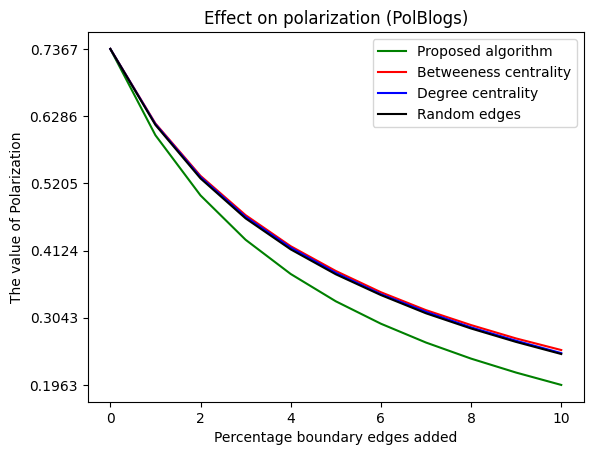

In [ ]:
x = [i for i in range(11)]

plt.plot(x, polarization_values, label="Proposed algorithm", color = "green")
plt.plot(x, polariz_bet_values, label="Betweeness centrality",color="red")
plt.plot(x, polariz_deg_values, label="Degree centrality", color="blue")
plt.plot(x, polariz_rand_values, label="Random edges", color="black")

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of Polarization")
plt.title("Effect on polarization (PolBlogs)")

# Adjust the y-axis ticks
min_value = min(min(polariz_bet_values), min(polarization_values))
max_value = max(max(polariz_bet_values), max(polarization_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/pol_b.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/pol_b.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

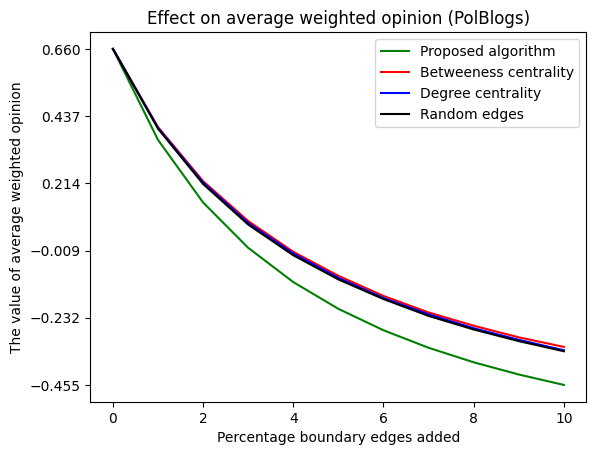

In [ ]:
x = [i for i in range(11)]

plt.plot(x, s_values, label="Proposed algorithm", color = "green")
plt.plot(x, s_bet_values, label="Betweeness centrality",color="red")
plt.plot(x, s_deg_values, label="Degree centrality", color="blue")
plt.plot(x, s_rand_values, label="Random edges", color="black")

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of average weighted opinion")
plt.title("Effect on average weighted opinion (PolBlogs)")

# Adjust the y-axis ticks
min_value = min(min(s_bet_values), min(s_values))
max_value = max(max(s_bet_values), max(s_values))
plt.yticks(np.linspace(min_value, max_value, 6))


plt.legend()

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/sb.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/sb.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

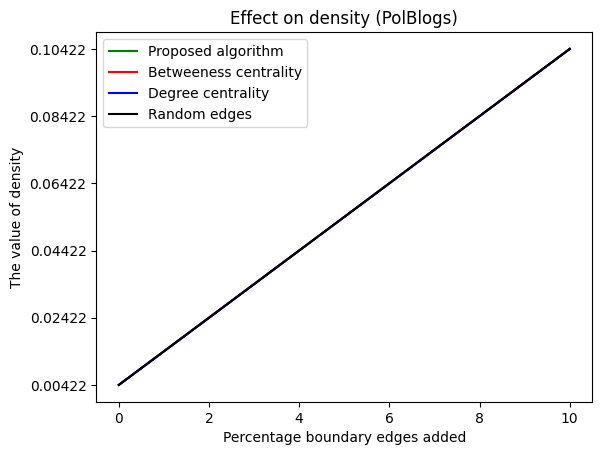

In [ ]:
plt.plot(x, rho_values, label="Proposed algorithm", color = "green")
plt.plot(x, rho_bet_values, label="Betweeness centrality",color="red")
plt.plot(x, rho_deg_values, label="Degree centrality", color="blue")
plt.plot(x, rho_rand_values, label="Random edges", color="black")

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of density")
plt.title("Effect on density (PolBlogs)")

# Adjust the y-axis ticks
min_value = min(min(rho_bet_values), min(rho_values))
max_value = max(max(rho_bet_values), max(rho_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/rho_b.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/rho_b.png')

plt.show()